<a href="https://colab.research.google.com/github/mgnarag/binarization-autoencoder/blob/main/Machine_Learning_by_JEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Building your Deep Learning model via Colab**
by Mark Jeremy Narag

January 30, 2024

VIP WERKSHOPPP

HELLO! HELLO! HELLO!

This is **JEM**, your gorgeous 💋 perfect 💯 flawless 💃 virtual assistant in todays bidyow

So ayun guys welcome to me! GO GO GO!
Let's get this going skrtttt!

So ang gagawin natin in today's workshop ay magbubuild tayo ng DEEP LEARNING MOWDELLLLL! Why do we need to know how to build a deep learning model? Because you don't have the face of a model so might as well learn how to create a deep learning mowdel. KIMIIIII!

Anyway basahin niyo nalang mga chika ko sa baba. If di niyo gets, google mo nalang ghorl 💅💅💅

# **STEP 0: IMPORT PACKAGES**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# **STEP 1: IMPORT FASHION MNIST**

Deep learning requires thousands of data for it to work? So how are we gonna get thousands of images? Do we have to capture thousands of photos inside the lab? Nauuuuur! We can just use the FASHION MNIST dataset (https://github.com/zalandoresearch/fashion-mnist)!!!



*OMG FASHION! Like Chanel? Dior? Gucci? Who's the designer? Ghorl calm down!*




"FASHION" MNIST dataset contains 70,000 images - 60,000 for training and 10,000 for testing. All are in low resolution (28 by 28 pixels), grayscale images divided into 10 categories. *Categoriesss??? Like winter couture? avante-garde? street wear? Ghorl...no...shut up... parang ganito sis:*

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>


Daming ebas so how to load ghorl?

Ganito mhie kopyahin mo nalang:

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist #standard na 'to sis di ko na iexplain ha?
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #ayan sis so idivide natin siya into training and testing.
# Nakadivide na actually yung fashion_mnist na dataset, need lang natin iextract yung training and testing.
# so yung train_images yan yung....images...omg shocking!
# tapos yung train_labels yan yung category per image beh so para siyang [0,3,2,5,1,6,3,8,...]. Yung unang picture ay category 0, second pic category 3, etc.

4422102/4422102 [==============================] - 1s 0us/step


Ayaw mo maniwala na 60,000 yung training tapos 10,000 yung testing. Ito check natin beh:

In [3]:
print('Shape of training images = ',train_images.shape)
print('Length of training labels = ',len(train_labels))
print('Shape of testing images = ',test_images.shape)
print('Length of testing labels = ',len(test_labels))

Shape of training images =  (60000, 28, 28)
Length of training labels =  60000
Shape of testing images =  (10000, 28, 28)
Length of testing labels =  10000


So ayun keri na sis may dataset na tayo. Bale eto pala yung 10 categories sis. Lagyan na natin ng name.

So category/label 0 is `T-shirt/top`, category/label 1 is `Trouser`...*trouser?? pants lang yan teh* then category/label 2  is `Pullover` then whatever go read the rest sis...

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#gagamitin natin 'to later sis. Basta i run mo na muna

Syempre VIP tayo so bet na bet natin pictures. Kaya tara na to the young and beautiful you!

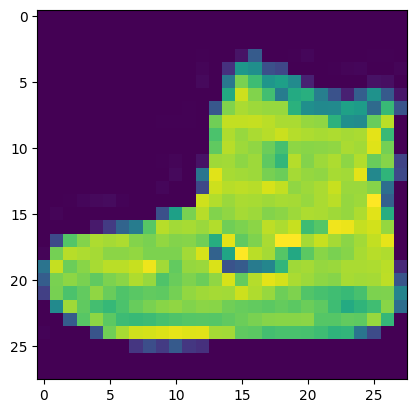

In [5]:
plt.figure()
plt.imshow(train_images[0]) #palitan mo lang yang "0" if di mo bet yung pic
plt.show()

Isang pic langggg??? Sige damihan natin:

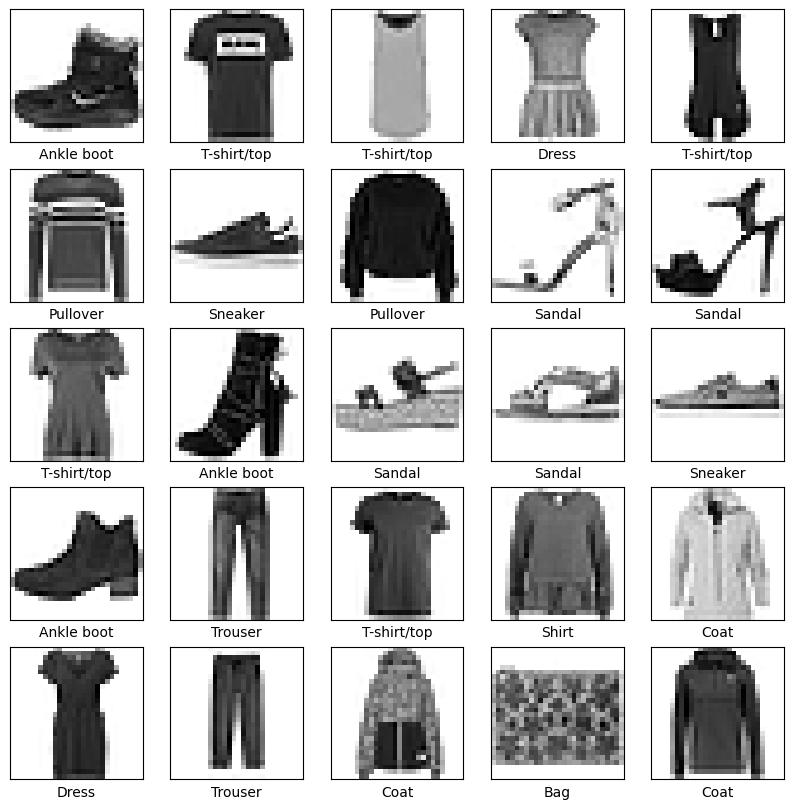

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

HAPPY NA? Okay na? Attitude ka sis.

Ayon last but not the least bago tayo magtrain ng mowwwdel. Ipre-process muna natin. Actually keri naman na yung images, isang pre-processing lang need natin gawin and that is to make the pixel values range from 0 to 1.

Originally, 0 to 255 kasi yung dataset mhie.

So if you will ask me kimiii, bakit need gawing 0 to 1, bat hindi nalang 0 to 255. Well one reason is if magpeperform ka ng operation sa malaking value, say 255, ay mhieee lalaki at lalaki yung value mo mhie baka di kayanin ng computational prowess mo mhie baka di magconverge during training yung model mhie. Anyway, actually sobrang daming reason google mo nalangsss.

Ay wait so ayun eto na talaga. Ito na yung pre-processing:

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0
#ay pak yan na yun? yes mhie bet mo ba mas mahirap na code?

# **STEP 2: BUILDING THE MOWDEL**

Omg dis is eat! dis is really really is it is it!

So yung gagamitin natin na mowdel is yung nasa screen! Luningning pasok!

So here (wow english ulit) we will use `tf.keras.Sequential`. From the name "sequential", ifofollow niya yung sequence ng codes mo.

For example, first layer is a convolutional layer with 32 filters and kernel size of 3 by 3 with relu activation function. In code this will translate us:

`tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),`

Then the next layer is a Max Pooling layer with kernel size 2 by 2. Since sequential siya, edi yung next line should be max pooling:

`tf.keras.layers.MaxPooling2D((2, 2)),`

And so on and so forth. So ayon yun na yun sis building blocks lang talaga siya. Dali lang no? Syempre kasi di na natin hinard code yung convolution and maxpooling layer huehue :D


Syempre workshop 'to so need natin machallengeee emee so yuh FILL IN THE BLANKS MGA SIS!!! WERK WERK WERK!

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # put your code here#
    # put your code here#
    # put your code here#
    tf.keras.layers.Flatten(), # i2 na yung 6272 nodes beh
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 6272)              0

Did you get the same result?

No? halla bakit?

Kimi syempre kulang yung code. Akshuliiii, ieexplain ko yan so makinig kayo charrr

# **STEP 3: TRAINING THE MOWDEL**

recap lang ganern:

* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

CTTO emeee

In [9]:
#So first step ay icompile muna natin? What is compile? YES!
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
# i2 na b3h. Mag train na tayo para happy. 20 epochs lang baka di tayo matapos ihhh
model.fit(train_images, train_labels, epochs=5, validation_split=0.2) #dagdag lang tayong validation beh

Epoch 1/5
1500/1500 [==============================] - 12s 5ms/step - loss: 0.4149 - accuracy: 0.8476 - val_loss: 0.3006 - val_accuracy: 0.8923
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2653 - accuracy: 0.9037 - val_loss: 0.2677 - val_accuracy: 0.9023
Epoch 3/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2181 - accuracy: 0.9189 - val_loss: 0.2315 - val_accuracy: 0.9161
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1823 - accuracy: 0.9334 - val_loss: 0.2336 - val_accuracy: 0.9193
Epoch 5/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1533 - accuracy: 0.9421 - val_loss: 0.2267 - val_accuracy: 0.9202


# **STEP 4: TESTING THE MOWDEL ON NBS**

Ayern keri na yung model. So itest na natin siya mhie sa never-before-seen images natin. Yung test_images mhieeee!

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.2427 - accuracy: 0.9144

Test accuracy: 0.9143999814987183


Okay so ngayon naman let's visualize para may pictures para happy!

So akshulli, yung nilalabas ng mowdel natin ay parang ganito ay linear outputs in logits. Ha? Logits? ano yun?

Sabi ni ChatGPT "In the context of machine learning and neural networks, the term "logits" refers to the raw, unnormalized predictions generated by a model. Logits are the values that precede the application of the softmax activation function in a classification task." yarrnnnnn!


so ayun beh apply daw tayo softmax para maconvert and logits into probabilities. So basicallyyyyy...it will transform logits into a probability distribution, para yung values ay between 0 and 1 tapos sum is 1.

Anyway ito yun:

In [12]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

#tapos itest na natin sa lahat
predictions = probability_model.predict(test_images) #this will contain all the predictions of the test_images wow english!

313/313 [==============================] - 1s 2ms/step


In [13]:
#Check natin mhie yung unang prediction:
print("Prediction na nakakalito:", predictions[0])
#Halla ano yang values na yan? yan yung probabilies per label mhie. So para malaman yung final label, gamit tayo argmax para hanapin max probability"
print("i2 final label mhie:",np.argmax(predictions[0]))

Prediction na nakakalito: [7.2549948e-09 4.2995793e-10 4.8390785e-08 4.6109194e-10 1.7105646e-10
 1.8478699e-05 1.6551098e-08 9.6403710e-05 2.3871787e-09 9.9988508e-01]
i2 final label mhie: 9


Ayan confident yung model mhie na class 9 daw siya which is "ankle boot"
Naniniwala ka ba? syempre di pa natin alam kasi di pa natin nakikita yung picture mhieee.

Pero check natin mhie ano ba yung true label niya mhie

In [14]:
print("true label:",test_labels[0])

true label: 9


TUMPAK GANERN!!!!

Anyway, i-visualize na natin mhie!!!!

define muna tayo ng function:

In [15]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Check na natin ankle boot mhieee

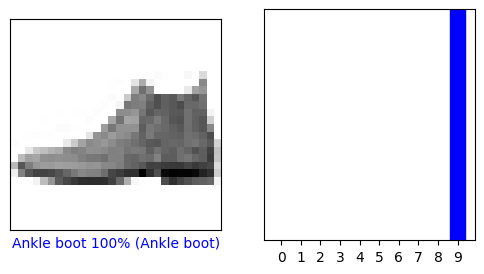

In [16]:
i = 0 #palitan mo itu if bet mo other picture mhie
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Keriiiii!!! Sige more picsss

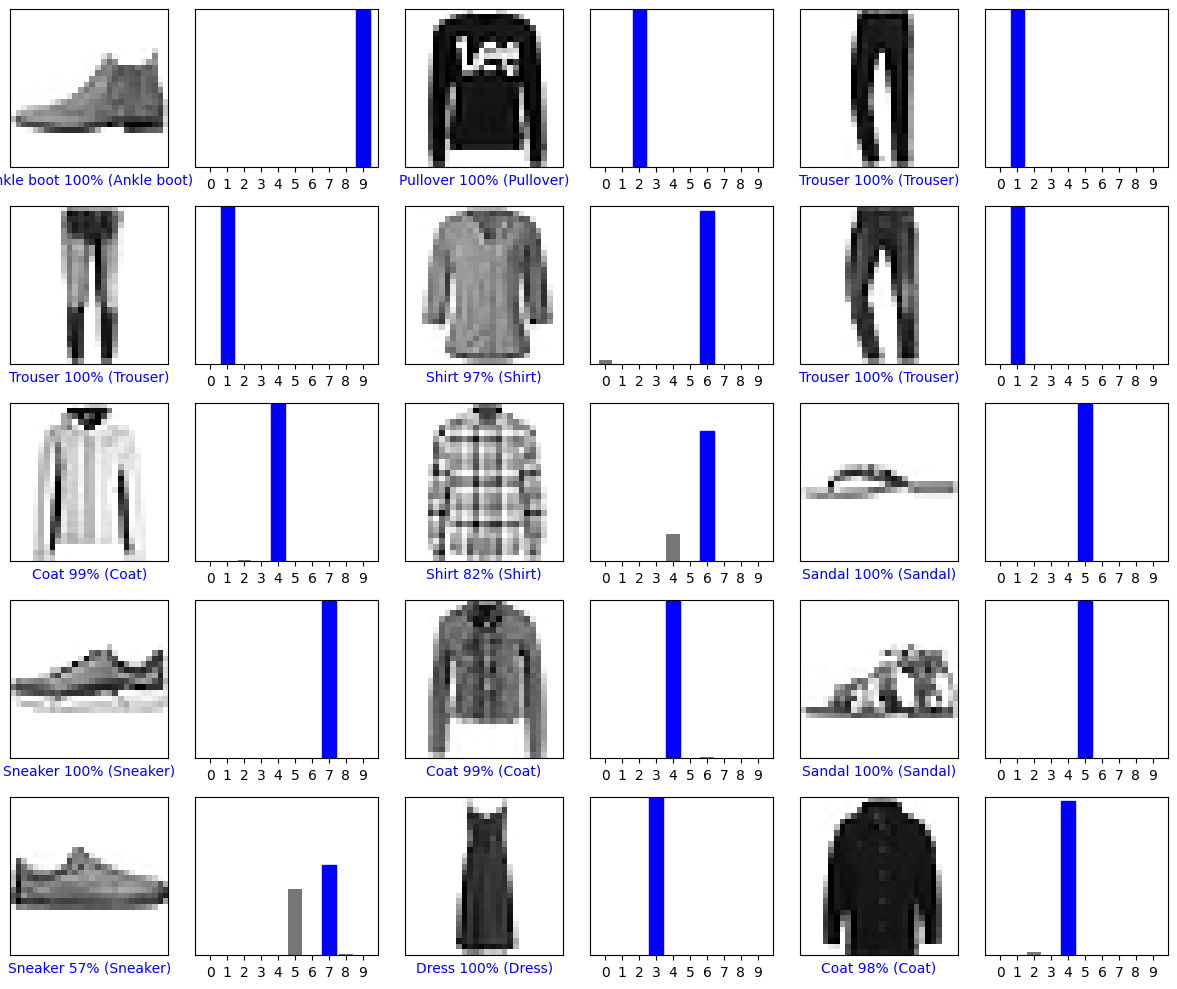

In [17]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# **STEP 5: TEST YOUR OWN IMAGE**

Take a picture of that ugly ass shirt you're wearing 🥰 or those dirty shoes 🥰 or those cheap pants 🥰

In [18]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:

!ls drive/My\ Drive
file_path = "/content/drive/My Drive/CS284/Project/" #palitan mo i2 mhie

Tapos read lang natin yung image mo mhie

In [31]:

image_path = 'Test.jpg'
original_image = cv2.imread(file_path + image_path)

gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
resized_image = cv2.resize(gray_image, (28, 28))
numpy_array_image = np.array(resized_image) #ayon mhie array kasi ang readable format ni mowdellll
test = numpy_array_image.reshape((1, 28, 28, 1))

Tapos try mo iplot mhie para makita natin mhie

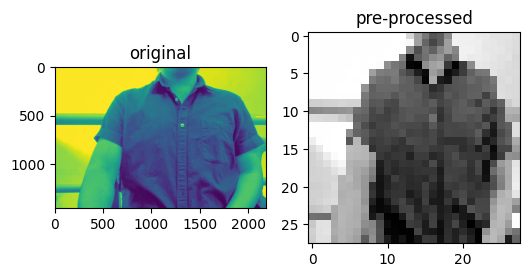

In [41]:
#put code here#

In [38]:
predictiones = probability_model.predict(test)
print(predictiones)
print("i2 final label mhie:",np.argmax(predictiones))
print("i2 final label mhie:",class_names[np.argmax(predictiones)])

1/1 [==============================] - 0s 17ms/step
[[1.8838793e-19 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
i2 final label mhie: 6
i2 final label mhie: Shirt


AYARNNN SHIRT DAW SIYA MHIE MEDYO TRUE NAMAN actually this is navy blue polo from ZARA 💅💅💅

show mo nga mhie yung image plus yung bar graph:


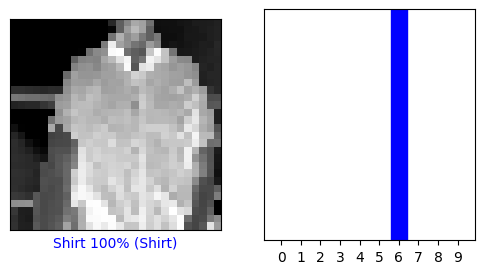

In [37]:
##put code here

AYON MHIE TAPOS NA BAHALA NA KAYO MAGEXPLORE MATATANDA NA KAYO KIMIIIII

power off ---- **JEM**, your gorgeous 💋 perfect 💯 flawless 💃 virtual assistant